In [1]:
import matplotlib.pyplot as plt
from utils import get_scalar_run_tensorboard
import os
import numpy as np
from scipy.stats import bootstrap

2024-12-31 17:14:11.524416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-31 17:14:11.542333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735690451.564438 2471576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735690451.571276 2471576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-31 17:14:11.595302: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [15]:
dfs = {}
for model in os.listdir("logs/CartPole") :
    if model != "fold_then_linear" :
        fold = []
        fold_no_relu = []
        mlp = []
        for fold_mlp in os.listdir(os.path.join("logs/CartPole", model)) :
            for file in os.listdir(os.path.join("logs/CartPole", model, fold_mlp)) :
                run = get_scalar_run_tensorboard(os.path.join("logs/CartPole", model, fold_mlp, file))
                if len(run) == 391 :
                    if "fold_no_relu" in fold_mlp :
                        fold_no_relu.append(run)
                    elif "fold" in fold_mlp :
                        fold.append(run)
                    elif ("mlp" in fold_mlp) or ("run" in fold_mlp):
                        mlp.append(run)
        if len(fold) > 1 :
            dfs[f"{model}_fold"] = np.array(fold)
        dfs[f"{model}_mlp"] = np.array(mlp)
        if len(fold_no_relu) > 1 :
            dfs[f"{model}_fold_no_relu"] = np.array(fold_no_relu)
                

In [2]:
def compare_models(namelist, labels, title, dfs) :
    for name, label in zip(namelist, labels) :
        res = bootstrap((dfs[name],), np.mean) 
        if dfs[name].shape[1] == 391 :
            steps = np.arange(256, 100100, 256) 
        elif dfs[name].shape[1] == 62 :
            steps = np.arange(16384, 1015809, 16384)
        else :
            steps = np.arange(4000, 1000001, 4000)
        plt.plot(steps, np.mean(dfs[name], axis=0), label=label)
        plt.fill_between(steps, res.confidence_interval.low, 
                         res.confidence_interval.high, alpha=.25)
    plt.title(title)
    plt.xlabel("step")
    plt.ylabel("reward")
    plt.legend()
    plt.show()

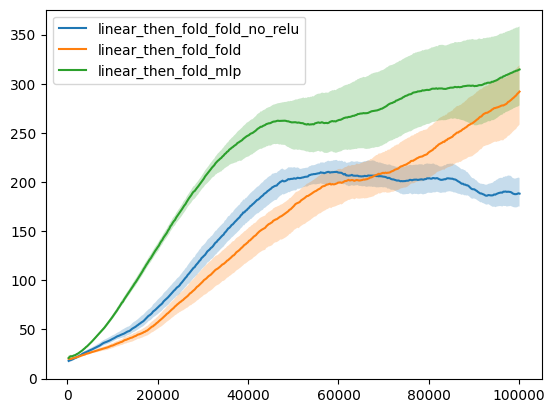

In [15]:
compare_models(["linear_then_fold_fold_no_relu", "linear_then_fold_fold", "linear_then_fold_mlp"])

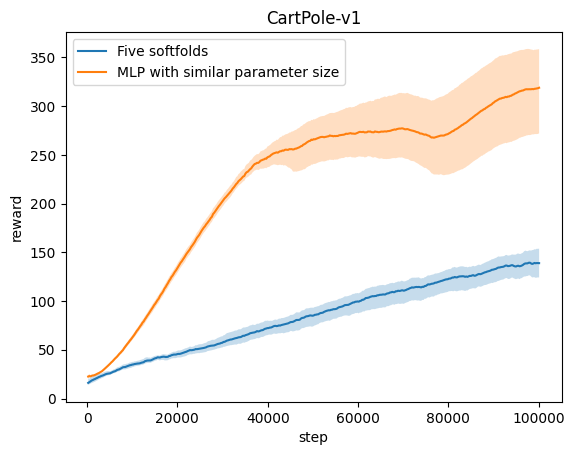

In [5]:
compare_models(["five_softfolds_double_has_stretch_fold", "five_softfolds_double_has_stretch_mlp"], ["Five softfolds", "MLP with similar parameter size"], "CartPole-v1")

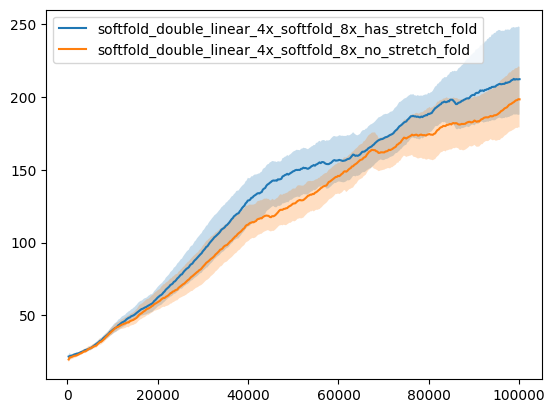

In [17]:
compare_models(["softfold_double_linear_4x_softfold_8x_has_stretch_fold", "softfold_double_linear_4x_softfold_8x_no_stretch_fold"])

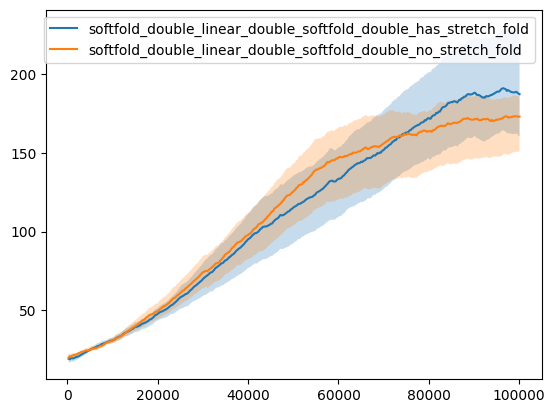

In [18]:
compare_models(["softfold_double_linear_double_softfold_double_has_stretch_fold", "softfold_double_linear_double_softfold_double_no_stretch_fold"])

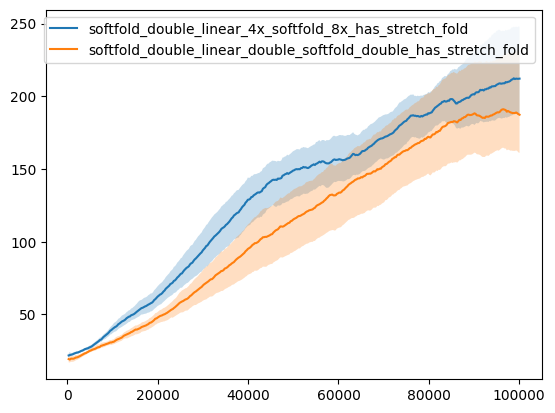

In [19]:
compare_models(["softfold_double_linear_4x_softfold_8x_has_stretch_fold", "softfold_double_linear_double_softfold_double_has_stretch_fold"])

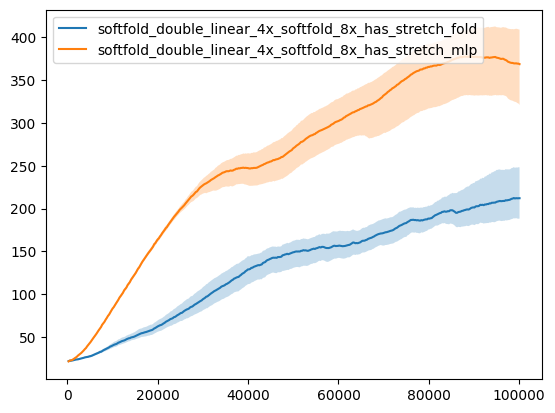

In [20]:
compare_models(["softfold_double_linear_4x_softfold_8x_has_stretch_fold", "softfold_double_linear_4x_softfold_8x_has_stretch_mlp"])

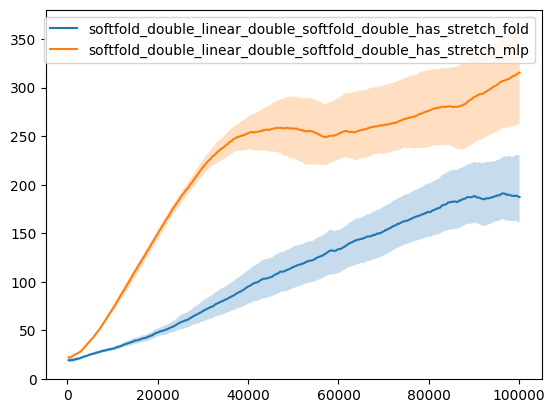

In [5]:
compare_models(["softfold_double_linear_double_softfold_double_has_stretch_fold", "softfold_double_linear_double_softfold_double_has_stretch_mlp"])

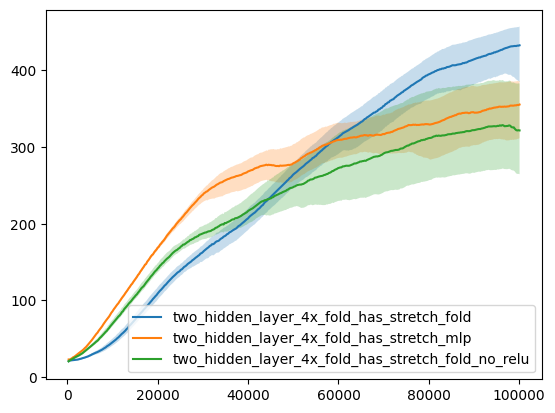

In [22]:
compare_models(["two_hidden_layer_4x_fold_has_stretch_fold", "two_hidden_layer_4x_fold_has_stretch_mlp", "two_hidden_layer_4x_fold_has_stretch_fold_no_relu"])

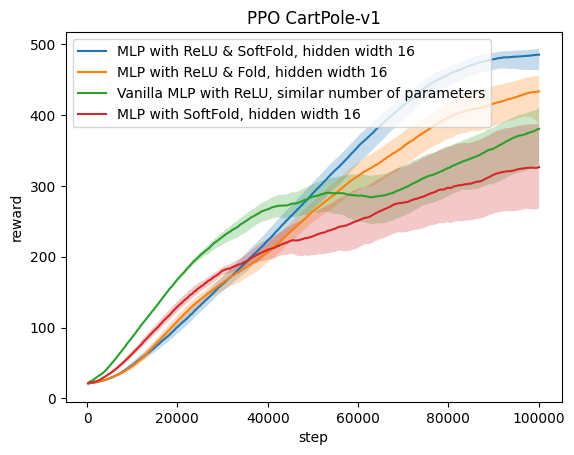

In [16]:
compare_models(["two_hidden_layer_4x_softfold_has_stretch_fold", "two_hidden_layer_4x_fold_has_stretch_fold", "two_hidden_layer_4x_softfold_has_stretch_mlp", "two_hidden_layer_4x_softfold_has_stretch_fold_no_relu"], ["MLP with ReLU & SoftFold, hidden width 16", "MLP with ReLU & Fold, hidden width 16", "Vanilla MLP with ReLU, similar number of parameters", "MLP with SoftFold, hidden width 16"], "PPO CartPole-v1", dfs)

/tmp/ipykernel_2393110/372558914.py:3: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  res = bootstrap((dfs[name],), np.mean)


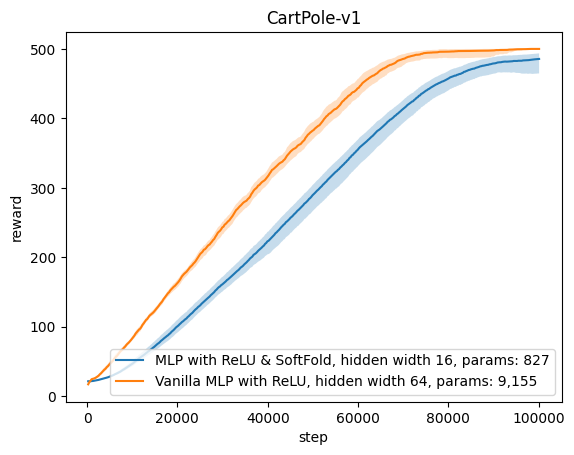

In [9]:
compare_models(["two_hidden_layer_4x_softfold_has_stretch_fold","full_mlp_mlp"], ["MLP with ReLU & SoftFold, hidden width 16, params: 827","Vanilla MLP with ReLU, hidden width 64, params: 9,155"], "CartPole-v1")

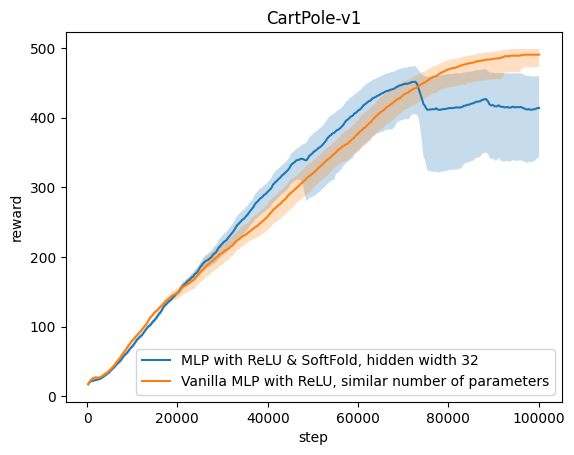

In [14]:
compare_models(["two_hidden_layer_8x_softfold_has_stretch_fold", "two_hidden_layer_8x_softfold_has_stretch_mlp"], ["MLP with ReLU & SoftFold, hidden width 32", "Vanilla MLP with ReLU, similar number of parameters"], "CartPole-v1")

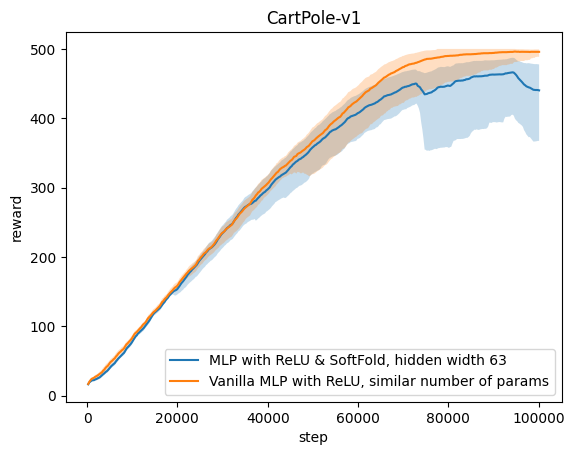

In [20]:
compare_models(["two_hidden_layer_16x_softfold_has_stretch_fold", "two_hidden_layer_16x_softfold_has_stretch_mlp"], ["MLP with ReLU & SoftFold, hidden width 63", "Vanilla MLP with ReLU, similar number of params"], "CartPole-v1")

In [6]:
lunar_dfs = {}
for model in os.listdir("logs/LunarLander") :
    if model != "fold_then_linear" :
        fold = []
        fold_no_relu = []
        mlp = []
        if not model.endswith('zip') :
            for fold_mlp in os.listdir(os.path.join("logs/LunarLander", model)) :
                if not fold_mlp.endswith('zip') :
                    for file in os.listdir(os.path.join("logs/LunarLander", model, fold_mlp)) :
                        run = get_scalar_run_tensorboard(os.path.join("logs/LunarLander", model, fold_mlp, file))
                        if "fold_no_relu" in fold_mlp :
                            fold_no_relu.append(run)
                        elif "fold" in fold_mlp :
                            fold.append(run)
                        elif ("mlp" in fold_mlp) or ("run" in fold_mlp):
                            mlp.append(run)
        if len(fold) > 1 :
            lunar_dfs[f"{model}_fold"] = np.array(fold)
        lunar_dfs[f"{model}_mlp"] = np.array(mlp)
        if len(fold_no_relu) > 1 :
            lunar_dfs[f"{model}_fold_no_relu"] = np.array(fold_no_relu)

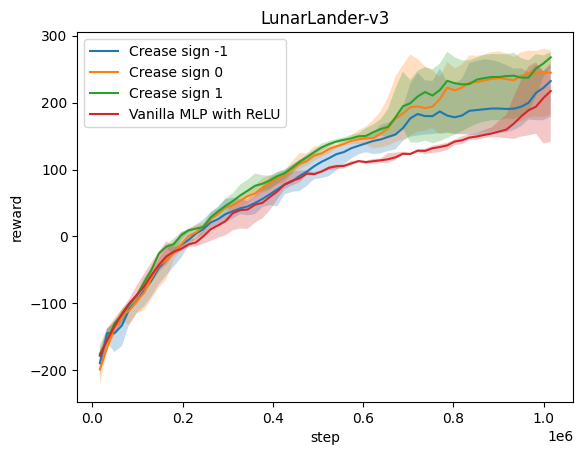

In [7]:
compare_models(["two_hidden_layer_8x_softfold_has_stretch_crease_sign_minus1_fold", "two_hidden_layer_8x_softfold_has_stretch_crease_sign0_fold", "two_hidden_layer_8x_softfold_has_stretch_crease_sign1_fold", "new_full_mlp_mlp"], ["Crease sign -1", "Crease sign 0", "Crease sign 1", "Vanilla MLP with ReLU"], "LunarLander-v3", lunar_dfs)

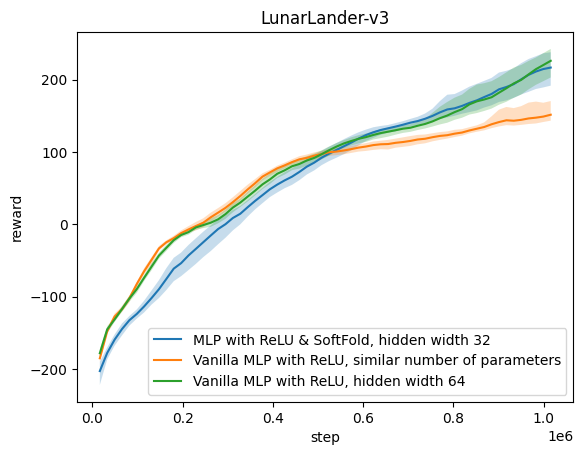

In [31]:
compare_models(["two_hidden_layer_4x_softfold_has_stretch_fold", "two_hidden_layer_4x_softfold_has_stretch_mlp", "full_mlp_mlp"], ["MLP with ReLU & SoftFold, hidden width 32", "Vanilla MLP with ReLU, similar number of parameters", "Vanilla MLP with ReLU, hidden width 64"], "LunarLander-v3", lunar_dfs)

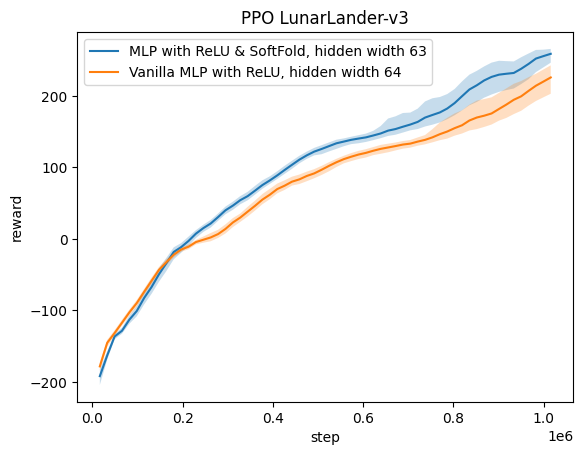

In [11]:
compare_models(["two_hidden_layer_8x_softfold_has_stretch_fold", "full_mlp_mlp"], ["MLP with ReLU & SoftFold, hidden width 63", "Vanilla MLP with ReLU, hidden width 64"], "PPO LunarLander-v3", lunar_dfs)

In [4]:
cheetah_dfs = {}
for model in os.listdir("logs/HalfCheetah") :
    if model != "fold_then_linear" :
        fold = []
        fold_no_relu = []
        mlp = []
        for fold_mlp in os.listdir(os.path.join("logs/HalfCheetah", model)) :
            for file in os.listdir(os.path.join("logs/HalfCheetah", model, fold_mlp)) :
                run = get_scalar_run_tensorboard(os.path.join("logs/HalfCheetah", model, fold_mlp, file))
                if "fold_no_relu" in fold_mlp :
                    fold_no_relu.append(run)
                elif "fold" in fold_mlp :
                    fold.append(run)
                elif ("mlp" in fold_mlp) or ("run" in fold_mlp):
                    mlp.append(run)
        if len(fold) > 1 :
            cheetah_dfs[f"{model}_fold"] = np.array(fold)
        cheetah_dfs[f"{model}_mlp"] = np.array(mlp)
        if len(fold_no_relu) > 1 :
            cheetah_dfs[f"{model}_fold_no_relu"] = np.array(fold_no_relu)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


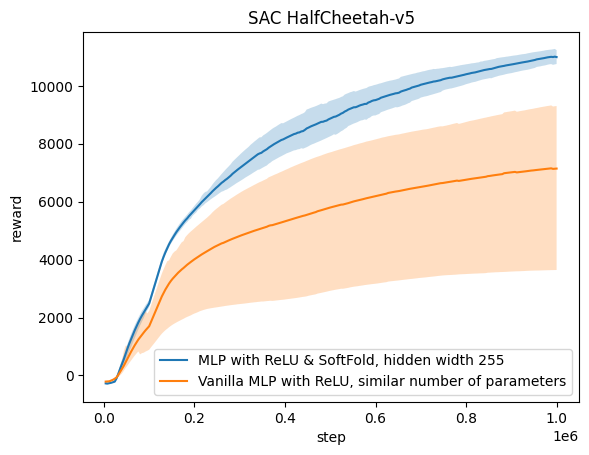

In [17]:
compare_models(["two_hidden_layer_15x_softfold_has_stretch_fold", "two_hidden_layer_15x_softfold_has_stretch_mlp"], ["MLP with ReLU & SoftFold, hidden width 255", "Vanilla MLP with ReLU, similar number of parameters"], "SAC HalfCheetah-v5", cheetah_dfs)

In [8]:
np.mean(cheetah_dfs["two_hidden_layer_15x_softfold_has_stretch_fold"][:,-1])

10992.05859375